In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import scipy.stats as st
import math
import datetime
import missingno as msno
from scipy.stats import norm, skew
from sklearn import metrics
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from mlxtend.regressor import StackingCVRegressor

### Adquisicion de datos



In [2]:
vg = pd.read_csv("vgsales.csv")
df = vg.copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16539 entries, 0 to 16538
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16539 non-null  object 
 1   Platform      16539 non-null  object 
 2   Year          16290 non-null  float64
 3   Genre         16539 non-null  object 
 4   Publisher     16539 non-null  object 
 5   NA_Sales      16539 non-null  float64
 6   EU_Sales      16539 non-null  float64
 7   JP_Sales      16539 non-null  float64
 8   Other_Sales   16539 non-null  float64
 9   Global_Sales  16539 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


### Limpieza de datos


In [ ]:
# Eliminar duplicados
df = df.drop_duplicates()

# Eliminar filas con valores nulos en 'Year'
df = df.dropna(subset=['Year'])

# Actualizar la columna 'Release_Date' después de limpiar
df['Release_Date'] = pd.to_datetime(df['Year'].astype(int).astype(str) + '-01-01', errors='coerce')


cleaned_file_path = 'D:\escUelea\Facu\FCFM\\7° semesse\\Minería de datos\Mineria\\MineriaDeDatos1950644/vgsales_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)

# Mostrar ruta del archivo limpio y primeras filas
df.shape, df.head()


<>:11: SyntaxWarning: invalid escape sequence '\M'
<>:11: SyntaxWarning: invalid escape sequence '\M'
C:\Users\asmm2\AppData\Local\Temp\ipykernel_21568\1657417598.py:11: SyntaxWarning: invalid escape sequence '\M'
  cleaned_file_path = 'D:\\escUelea\\Facu\\FCFM\\7° semesse\\Minería de datos\Mineria\\MineriaDeDatos1950644/vgsales_cleaned.csv'


((16290, 11),
          Name Platform    Year     Genre   Publisher  NA_Sales  EU_Sales  \
 0     Kaboom!     2600  1980.0      Misc  Activision      1.07      0.07   
 1      Boxing     2600  1980.0  Fighting  Activision      0.72      0.04   
 2  Ice Hockey     2600  1980.0    Sports  Activision      0.46      0.03   
 3     Freeway     2600  1980.0    Action  Activision      0.32      0.02   
 4      Bridge     2600  1980.0      Misc  Activision      0.25      0.02   
 
    JP_Sales  Other_Sales  Global_Sales Release_Date  
 0       0.0         0.01          1.15   1980-01-01  
 1       0.0         0.01          0.77   1980-01-01  
 2       0.0         0.01          0.49   1980-01-01  
 3       0.0         0.00          0.34   1980-01-01  
 4       0.0         0.00          0.27   1980-01-01  )

### Estadisticas descriptivas


In [4]:
# Cargar el dataset limpio
df = pd.read_csv("vgsales_cleaned.csv")

# Estadísticas de columnas numéricas
print("Estadísticas numéricas:")
print(df.describe())

# Cantidad de juegos por género
print("\nCantidad de juegos por género:")
print(df['Genre'].value_counts())

# Cantidad de juegos por plataforma
print("\nCantidad de juegos por plataforma:")
print(df['Platform'].value_counts())

# Top 10 publishers
print("\nTop 10 publishers:")
print(df['Publisher'].value_counts().head(10))

# Correlaciones entre variables numéricas
print("\nCorrelación entre variables numéricas:")
print(df.corr(numeric_only=True))

Estadísticas numéricas:
               Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16290.000000  16290.000000  16290.000000  16290.000000  16290.000000   
mean    2006.404727      0.265646      0.147740      0.078838      0.048428   
std        5.831618      0.822457      0.509317      0.311888      0.190089   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2017.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16290.000000  
mean       0.540926  
std        1.567391  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.480000  
max       82.740000  

Cantidad de juegos por género:
Genre
Action          3251
Sports 

### Visualizacion de datos

<Figure size 1000x600 with 0 Axes>

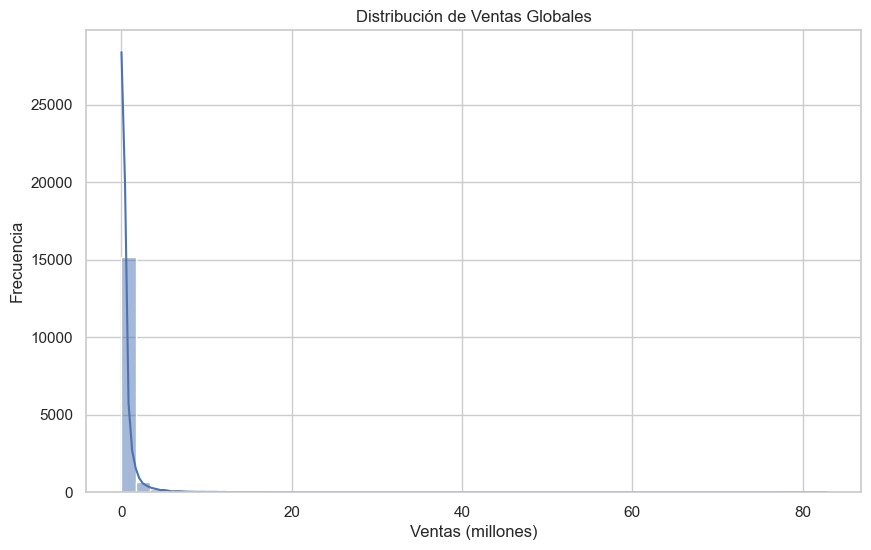

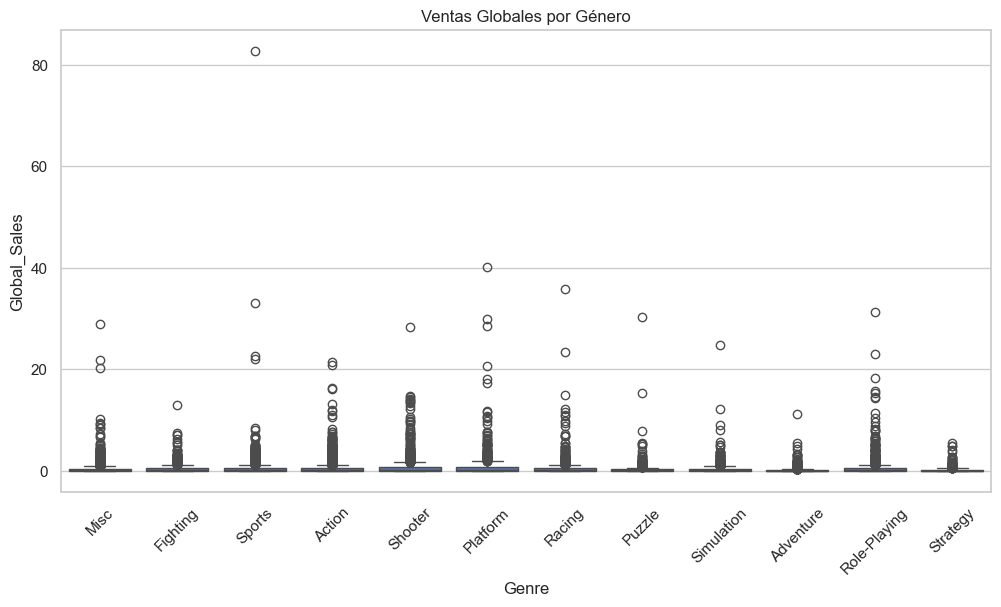

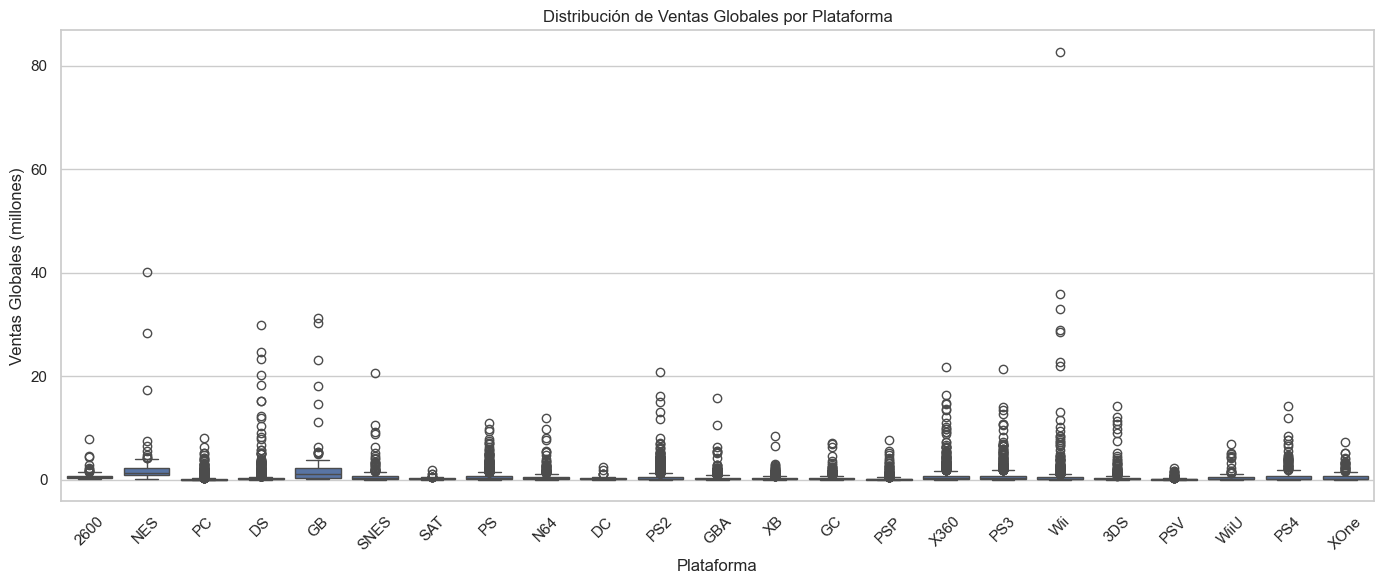

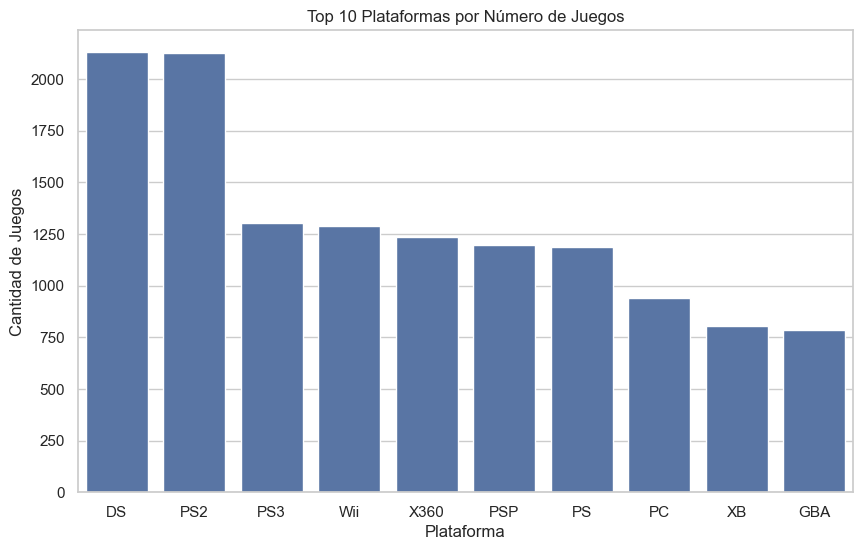

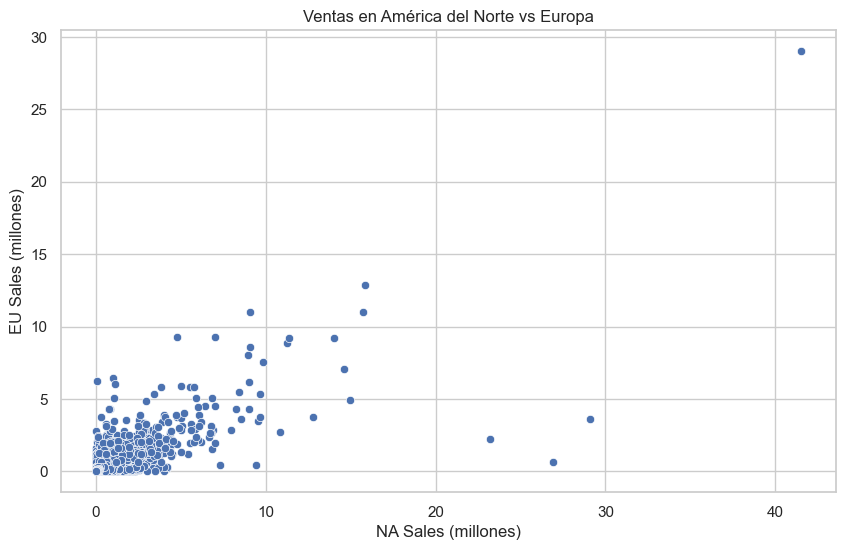

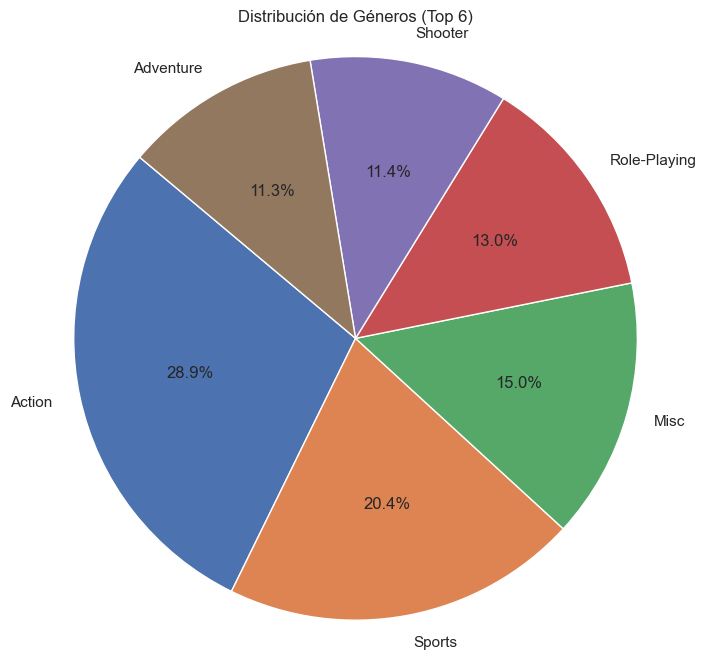

In [10]:

# Cargar el dataset limpio
df = pd.read_csv('vgsales_cleaned.csv')

# Configuración de estilo
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# 1. Histograma de ventas globales
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], bins=50, kde=True)
plt.title('Distribución de Ventas Globales')
plt.xlabel('Ventas (millones)')
plt.ylabel('Frecuencia')
plt.show()

# 2. Boxplot de ventas globales por género
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=df)
plt.title('Ventas Globales por Género')
plt.xticks(rotation=45)
plt.show()
# Filtrar plataformas con suficientes datos (al menos 30 juegos)
valid_platforms = df['Platform'].value_counts()[df['Platform'].value_counts() >= 30].index
filtered_df = df[df['Platform'].isin(valid_platforms)]

# Crear boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered_df, x='Platform', y='Global_Sales')
plt.xticks(rotation=45)
plt.title('Distribución de Ventas Globales por Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xlabel('Plataforma')
plt.tight_layout()
plt.show()

# 3. Gráfico de barras: Top 10 plataformas con más juegos
plt.figure(figsize=(10, 6))
platform_counts = df['Platform'].value_counts().head(10)
sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.title('Top 10 Plataformas por Número de Juegos')
plt.xlabel('Plataforma')
plt.ylabel('Cantidad de Juegos')
plt.show()

# 4. Scatter plot: NA_Sales vs EU_Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=df)
plt.title('Ventas en América del Norte vs Europa')
plt.xlabel('NA Sales (millones)')
plt.ylabel('EU Sales (millones)')
plt.show()

# 5. Pie chart: Distribución de juegos por género (Top 6)
genre_counts = df['Genre'].value_counts().head(6)
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Géneros (Top 6)')
plt.axis('equal')
plt.show()


### Statistic test

In [8]:

from scipy.stats import f_oneway, kruskal
from scipy.stats import levene

# Cargar datos
df = pd.read_csv('vgsales_cleaned.csv')

# Seleccionar géneros con suficientes muestras (al menos 30)
valid_genres = df['Genre'].value_counts()[df['Genre'].value_counts() >= 30].index
filtered_df = df[df['Genre'].isin(valid_genres)]

# Agrupar ventas por género
groups = [group['Global_Sales'].values for name, group in filtered_df.groupby('Genre')]

# Verificar homogeneidad de varianzas (Levene)
levene_stat, levene_p = levene(*groups)

# Aplicar ANOVA si varianzas son iguales, si no, Kruskal-Wallis
if levene_p > 0.05:
    stat, p_value = f_oneway(*groups)
    method = "ANOVA"
else:
    stat, p_value = kruskal(*groups)
    method = "Kruskal-Wallis"

# Mostrar resultados
print(f"Prueba utilizada: {method}")
print(f"Estadístico: {stat:.4f}")
print(f"Valor p: {p_value:.4e}")

if p_value < 0.05:
    print("Hay diferencias significativas entre géneros.")
else:
    print("No hay diferencias significativas entre géneros.")


Prueba utilizada: Kruskal-Wallis
Estadístico: 973.3912
Valor p: 1.0200e-201
Hay diferencias significativas entre géneros.


R² del modelo lineal: 1.0000

Coeficientes del modelo:
      Variable  Coeficiente
0     NA_Sales     0.999954
1     EU_Sales     0.999978
2     JP_Sales     0.999881
3  Other_Sales     0.999606


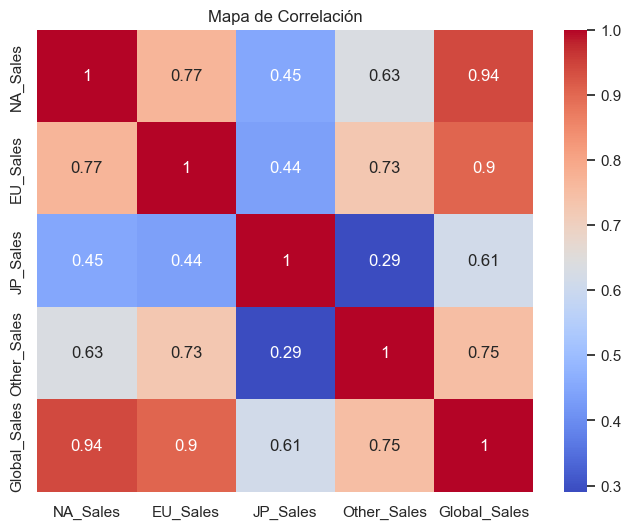

In [11]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Cargar datos
df = pd.read_csv('vgsales_cleaned.csv')

# Variables predictoras y objetivo
X = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = df['Global_Sales']

# Crear y entrenar modelo lineal
model = LinearRegression()
model.fit(X, y)

# Predicciones
y_pred = model.predict(X)

# Calcular R²
r2 = r2_score(y, y_pred)
print(f"R² del modelo lineal: {r2:.4f}")

# Mostrar coeficientes
coef_df = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.coef_})
print("\nCoeficientes del modelo:")
print(coef_df)

# Mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlación')
plt.show()


### Data classification

Matriz de confusión:
[[1577    0   23]
 [   0 1682   23]
 [   7   28 1547]]

Reporte de clasificación:
              precision    recall  f1-score   support

       Altas       1.00      0.99      0.99      1600
       Bajas       0.98      0.99      0.99      1705
      Medias       0.97      0.98      0.97      1582

    accuracy                           0.98      4887
   macro avg       0.98      0.98      0.98      4887
weighted avg       0.98      0.98      0.98      4887



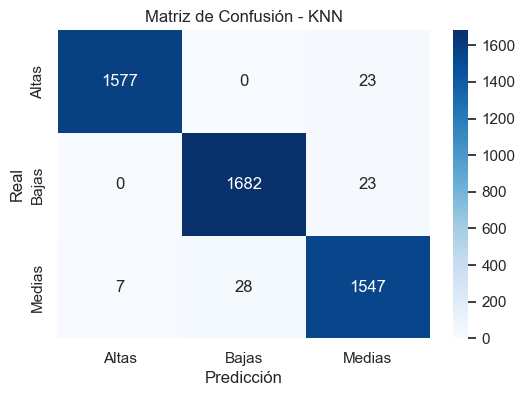

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('vgsales_cleaned.csv')

# Crear clases de ventas (bajas, medias, altas)
df['Sales_Class'] = pd.qcut(df['Global_Sales'], q=3, labels=['Bajas', 'Medias', 'Altas'])

# Variables predictoras
X = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = df['Sales_Class']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Reporte de clasificación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Visualizar matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title("Matriz de Confusión - KNN")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


### Clustering


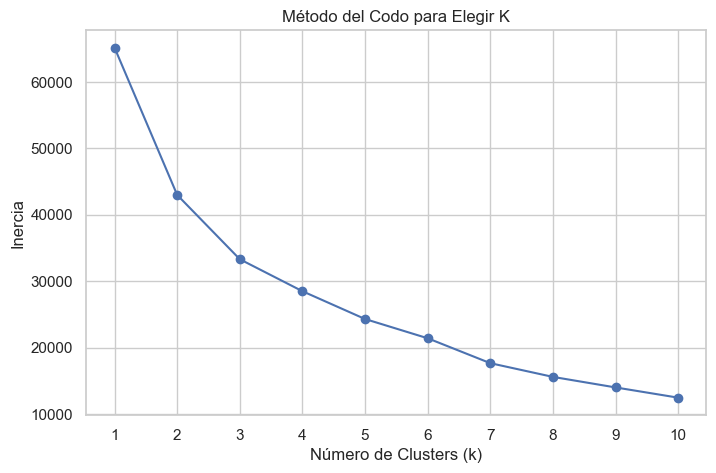

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Cargar datos
df = pd.read_csv('vgsales_cleaned.csv')

# Selección de variables numéricas
features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
X = df[features]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar número óptimo de clusters con método del codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Gráfico del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para Elegir K')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()



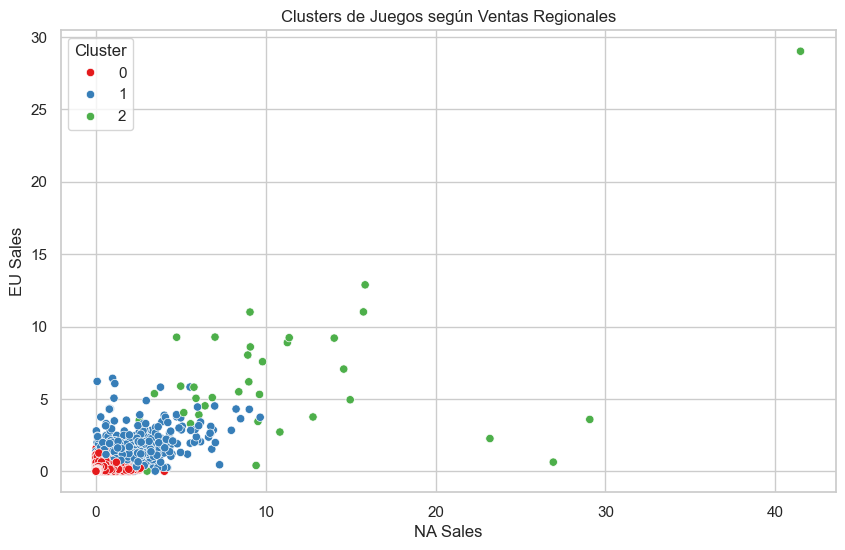

In [16]:
# Elegimos k = 3 como ejemplo
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar clusters (2D con NA vs EU Sales por ejemplo)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NA_Sales', y='EU_Sales', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters de Juegos según Ventas Regionales')
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')
plt.legend(title='Cluster')
plt.show()


### Forecasting


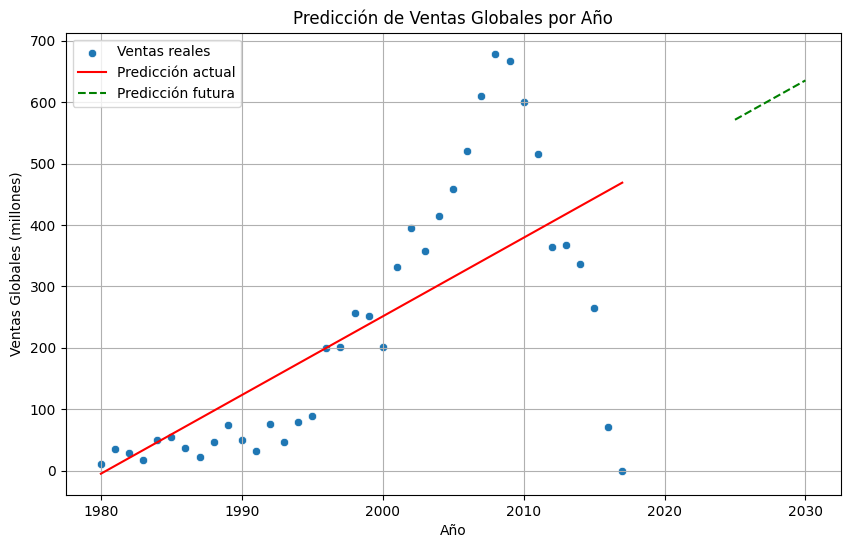

In [3]:

from sklearn.linear_model import LinearRegression

# Cargar datos
df = pd.read_csv('vgsales_cleaned.csv')

# Convertir 'Year' a numérico y eliminar nulos
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])

# Agrupar ventas globales por año
sales_by_year = df.groupby('Year')['Global_Sales'].sum().reset_index()

# Modelo lineal
X = sales_by_year[['Year']]
y = sales_by_year['Global_Sales']
model = LinearRegression()
model.fit(X, y)

# Predicciones existentes
sales_by_year['Predicted'] = model.predict(X)

# Añadir años futuros
future_years = pd.DataFrame({'Year': list(range(2025, 2031))})
future_years['Predicted'] = model.predict(future_years)

# Visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Global_Sales', data=sales_by_year, label='Ventas reales')
sns.lineplot(x='Year', y='Predicted', data=sales_by_year, color='red', label='Predicción actual')
sns.lineplot(x='Year', y='Predicted', data=future_years, color='green', linestyle='--', label='Predicción futura')
plt.title('Predicción de Ventas Globales por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (millones)')
plt.legend()
plt.grid(True)
plt.show()


### Analisis de texto


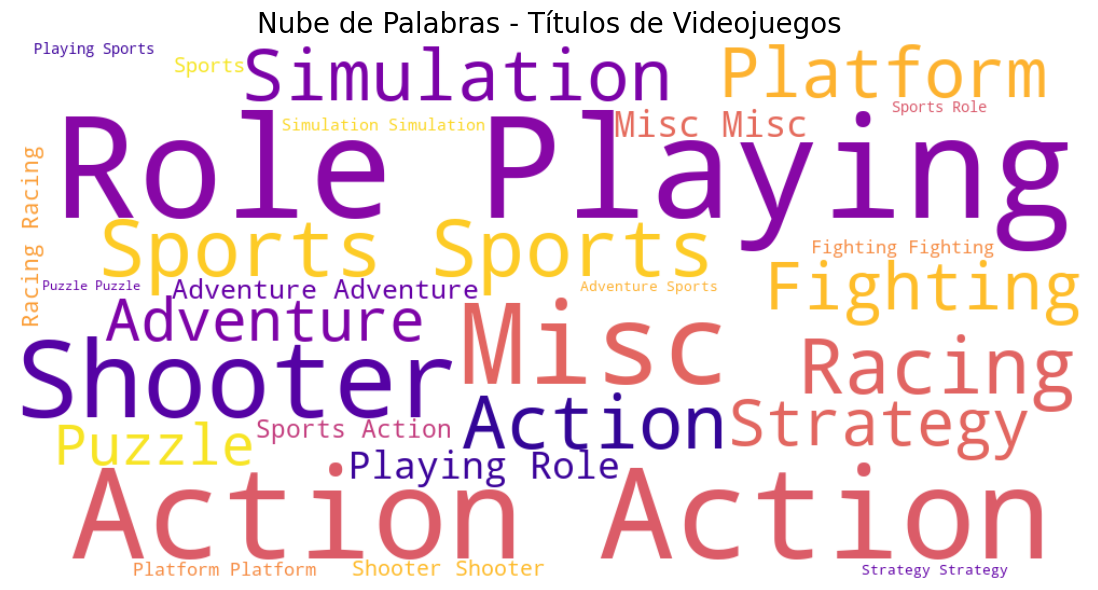

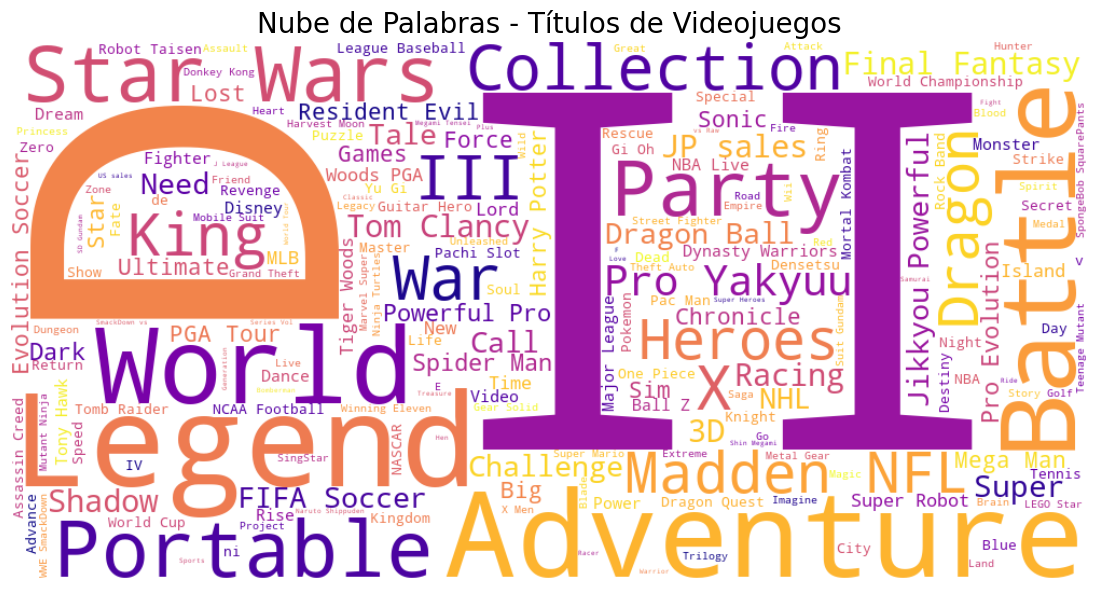

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Cargar dataset limpio
df = pd.read_csv('vgsales_cleaned.csv')

# Unir todos los generos en un solo texto
text = ' '.join(df['Genre'].dropna().astype(str).values)

# Crear nube de palabras
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='plasma').generate(text)

# Mostrar nube de palabras
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Generos', fontsize=20)
plt.show()

# Unir todos los nombres en un solo texto
text = ' '.join(df['Name'].dropna().astype(str).values)

#palabras a ignorar
stopwords = set(STOPWORDS)
stopwords.update(["Game", "Edition", "Version", "The", "of", "and"])

# Crear nube de palabras
wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      stopwords=stopwords, colormap='plasma').generate(text)

# Mostrar nube de palabras
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Títulos de Videojuegos', fontsize=20)
plt.show()